# <font color="navy"> Lecture 6: Dimension Reduction Methods

## 6.1 차원의 저주(Curse of dimensionality)
- 데이터셋의 변수 또는 feature가 많아질수록 데이터 공간의 부피가 기하급수적으로 증가하게 되기 때문에 데이터의 밀도가 희소(sparse)해짐 
- 상대적으로 데이터의 수가 적어지기 때문에 overfitting의 문제가 발생할 여지가 많음 

![](https://img1.daumcdn.net/thumb/R1920x0/?fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99FF9F335B8A484A31820B)

## 6.2 주성분분석(Principal component analysis; PCA)
#### PCA의 목적
- Data compression
    - 고차원의 데이터를 저차원으로 변환  데이터 압축 
    - 메모리/디스크 저장 공간 감소
    - Machine learning 알고리즘의 속도 증가

- Visualization
    - 고차원의 데이터는 시각적으로 표현하기 어려움
    - 2차원 평면에서 시각화를 통해 데이터 포인트 간의 관계, 기존 feature 와의 관계를 시각적으로 파악 가능
    ![](https://img1.daumcdn.net/thumb/R1920x0/?fname=http%3A%2F%2Fcfile6.uf.tistory.com%2Fimage%2F996F65335B8A493207D19B)
    

#### Example 
- 이탈리아의 같은 지역의 3개의 경작지에서 생산된 와인의 13가지 화학적 성질을 feature로 사용
    - 13D => 2D 로 표현 
    - 각 와인의 특성이 2차원 평면에 점으로 표현
    - 13개의 feature가 2차원 평면에 화살표로 표현 

![](http://www.vince.vu/software/ggbiplot.png)

#### 고유값과 고유벡터

- 확률벡터 $\mathbf x = \begin{bmatrix}
x_1\\x_2\\ \vdots \\ x_p
\end{bmatrix}$
- 확률벡터 $\mathbf x$의 평균과 공분산 
$\mathbf \mu = \begin{bmatrix}
\mu_1\\\mu_2\\ \vdots \\ \mu_p
\end{bmatrix}, 
\Sigma= \begin{bmatrix}
\sigma_{11}&\sigma_{12} & \cdots & \sigma_{1p}\\
\sigma_{21}&\sigma_{22} & \cdots & \sigma_{2p}\\
\vdots&\vdots&\vdots&\vdots\\
\sigma_{p1}&\sigma_{p2} & \cdots & \sigma_{pp}\\
\end{bmatrix}$

$\sigma_{ij}=cov(x_i, x_j)$

- $\lambda_1 \geq \lambda_2 \geq \cdots\lambda_p \geq 0$: $\Sigma$의 고유값(eigenvalue)
- $\mathbf e_1, \mathbf e_2, \ldots, \mathbf e_p$: 각 $\lambda$에 대응되는 고유벡터(eigenvector)

#### 주성분(principal component): $y_1, y_2, \cdots, y_p$

1st PC: $y_1 = \mathbf a_1'\mathbf x = a_{11}x_1 +a_{21}x_2 + \cdots + a_{p1} x_p$

2nd PC: $y_2 = \mathbf a_2'\mathbf x = a_{12}x_1 +a_{22}x_2 + \cdots + a_{p2} x_p$

$\vdots$

p-th PC: $y_p = \mathbf a_p'\mathbf x = a_{1p}x_1 +a_{2p}x_2 + \cdots + a_{pp} x_p$

$\sum_j a_{ij}^2 = 1$

- $y_1$:  $x_i$들의 선형결합 중 가장 분산이 큰 것
- $y_2$: $y_1$과 독립(공분산=0)이면서 $x_i$들의 선형결합 중 가장 분산이 큰 것
- $\vdots$
- $y_p$: $y_1, \ldots, y_{p-1}$과 독립(공분산=0)이면서 $x_i$들의 선형결합 중 가장 분산이 큰 것

    
<img src=https://www.learnopencv.com/wp-content/uploads/2018/01/pca-3d-768x768.png width=40%>
    
    

- 주성분을 찾는 방법
    어떻게 하면 **주성분 점수$a_{ij}$**를 찾을 수 있을까?
    - $\mathbf a_1$은 제일 큰 고유값 $\lambda_1$에 대응되는 고유벡터 $\mathbf e_1$과 같음
    - $\mathbf a_2$은 두번째로 큰 고유값 $\lambda_2$에 대응되는 고유벡터 $\mathbf e_2$과 같음 <br>
    $\vdots$

#### 주성분의 성질 
- 주성분들은 서로 상관관계가 없음(orthogonal)
- 각 주성분의 분산은 해당하는 고유값 $\lambda_i$와 같음 
- $\lambda_1 +\cdots \lambda_p = \sigma_{11} + \cdots + \sigma_{pp}$
- 전체 변동 중 $k$ 번째 주성분이 설명하는 변동의 비율 = $\lambda_k / (\lambda_1 +\cdots + \lambda_p)$
- 처음 $m$개의 주성분의 분산의 합은 $\lambda_1+\lambda_2+\cdots \lambda_m$이므로 
$$\mbox{첫 m개의 주성분에 의해 설명되는 변동의 비율} = \frac{\lambda_1 + \cdots+\lambda_m }{\lambda_1 + \cdots+\lambda_p} $$

#### 표준화된 변수의 주성분 
- 각 변수가 평균 0, 표준편차 1이 되도록 표준화
$$z_i = \frac{x_i - \mu_i}{\sqrt{\sigma_{ii}}}$$
- 상관계수 행렬의 고유값/고유벡터를 사용한 주성분분석과 동일
- 각 변수의 분산의 합 = $\lambda_1 +\cdots \lambda_p =p$
- 전체 변동 중 $k$ 번째 주성분이 설명하는 변동의 비율 = $\lambda_k / p$

#### 주성분 개수의 선택 
- 얼마나 많은 주성분들이 주어진 데이터셋의 적절한 요약을 위해서 필요한가?
    - $m(<p)$: 선택된 주성분의 개수
- Rule of Thumb
    - 총분산 설명하는 비중이 70%에서 90% 사이에서 선택
    - 평균 고유값 $\sum_i \lambda_i / p$보다 작은 고유값을 갖는 주성분 제거
        - 평균고유값=평균분산
        - 표준화된 변수를 사용한다면 평균분산=1이므로 1보다 작은 고유값 제거
        - 0.7보다 작은 고유값을 제거하는 것 제안하기도 함

- Scree plot 활용
    - $\lambda_i$를 $i$에 대해 그린 그림 
    - 팔꿈치에 대응하는 즉, 기울기가 가파른 상태에서 완만한 상태로 변화하는 점에 대응하는 값까지 보유

### Example: 올림픽 7종 경기 결과 
- 1988년 서울올림픽 25명 선수의 여자 7종경기 결과
- 100m 허들(hurdle), 투포환(shot), 높이뛰기(highjump), 200m 달리기(run200m), 멀리뛰기(longjump), 투창(javelin), 800m 달리기(run800m)
- 데이터의 구조를 탐색하고 득점 시스템에 의해 획득된 점수(score)와 어떻게 관련되는지 평가하려함
- 값이 클 수록 좋은 기록이 되도록 변환 후 분석 진행 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA # 주성분 분석
from sklearn.preprocessing import StandardScaler # 표준화

data_path = "../data/"

In [2]:
heptathlon = pd.read_csv(data_path + "heptathlon.csv", index_col=0)

In [3]:
heptathlon.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540


선형관계가 존재하는지를 파악, 강한 상관관계를 가져야 저차원으로 축소가능
- 선형관계가 아니라면 선형관계로 만들고 pca를 진행하는 것이 효과적

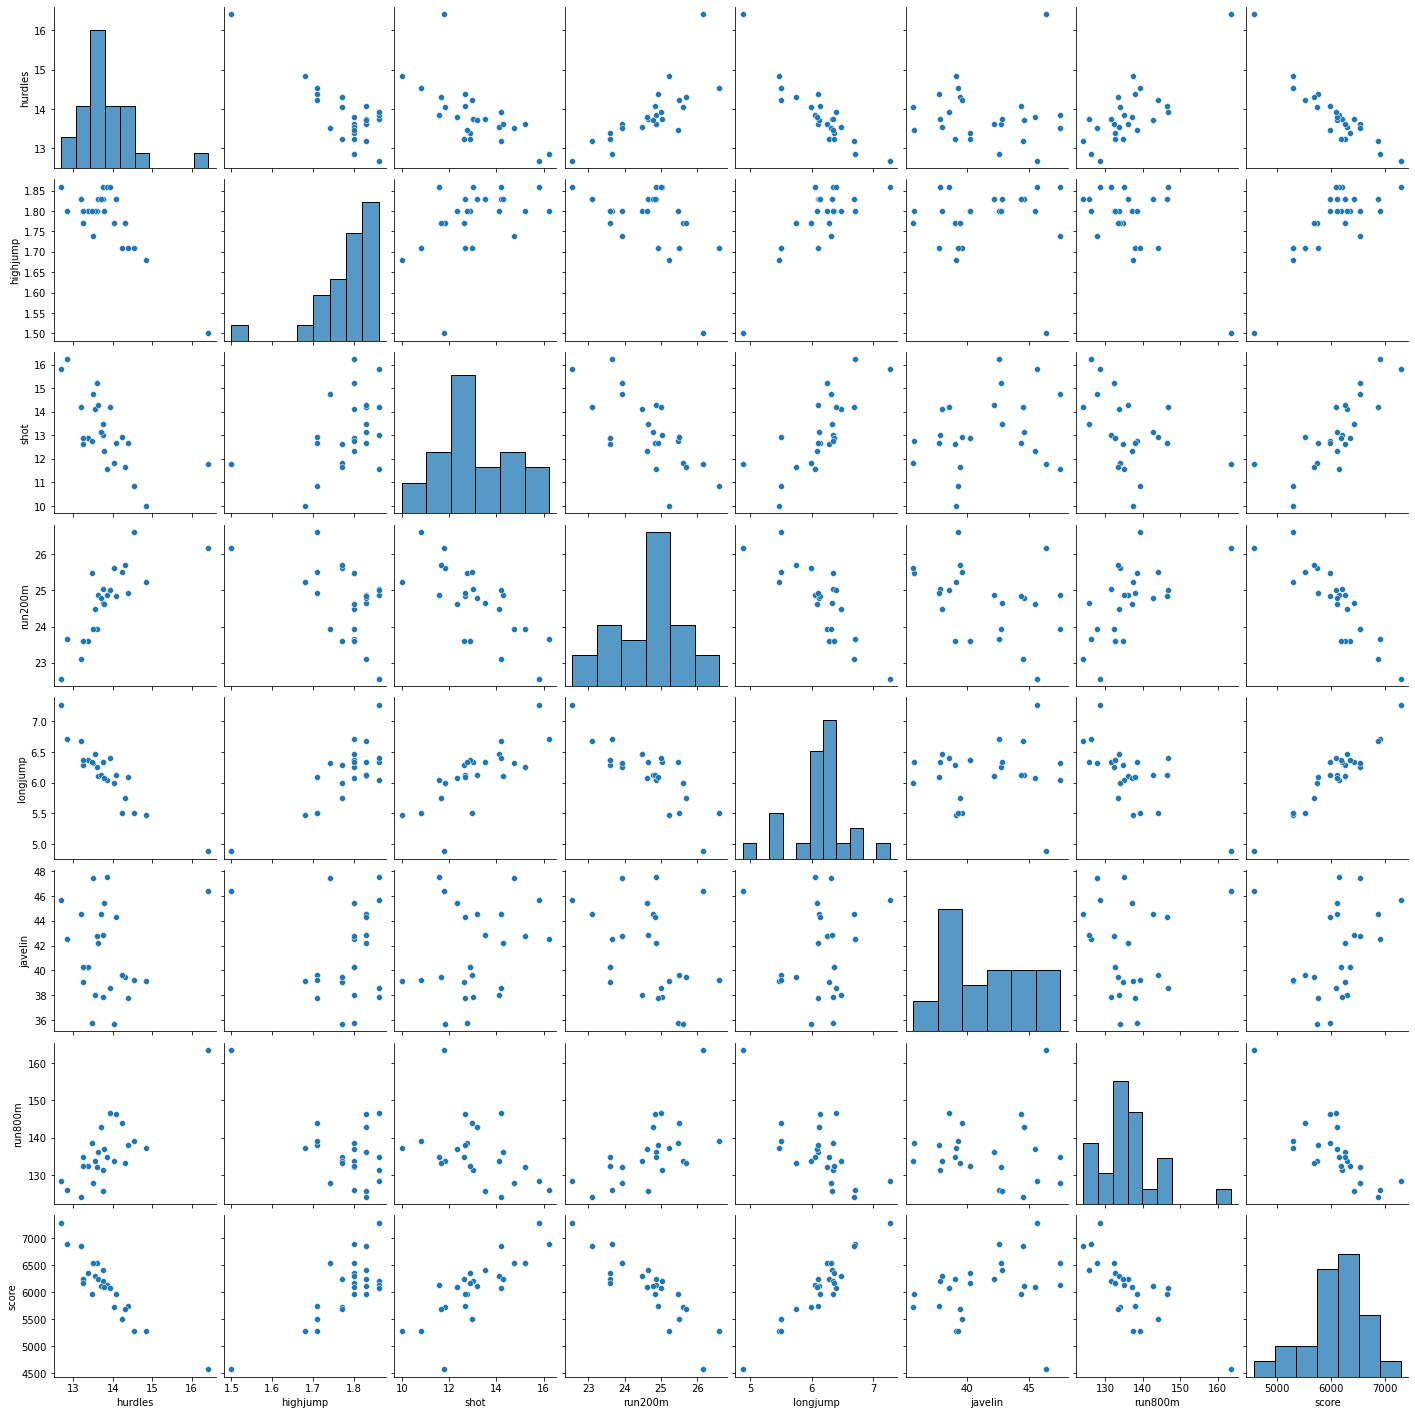

In [4]:
sns.pairplot(heptathlon)
plt.show()

아래 세가지 변수는 최종점수와 반비례관계이므로 변환필요
- 전부다 양의 값을 가지며, 클 수록 좋은 값으로 변경

In [5]:
heptathlon.hurdles = max(heptathlon.hurdles) - heptathlon.hurdles
heptathlon.run200m = max(heptathlon.run200m) - heptathlon.run200m
heptathlon.run800m = max(heptathlon.run800m) - heptathlon.run800m

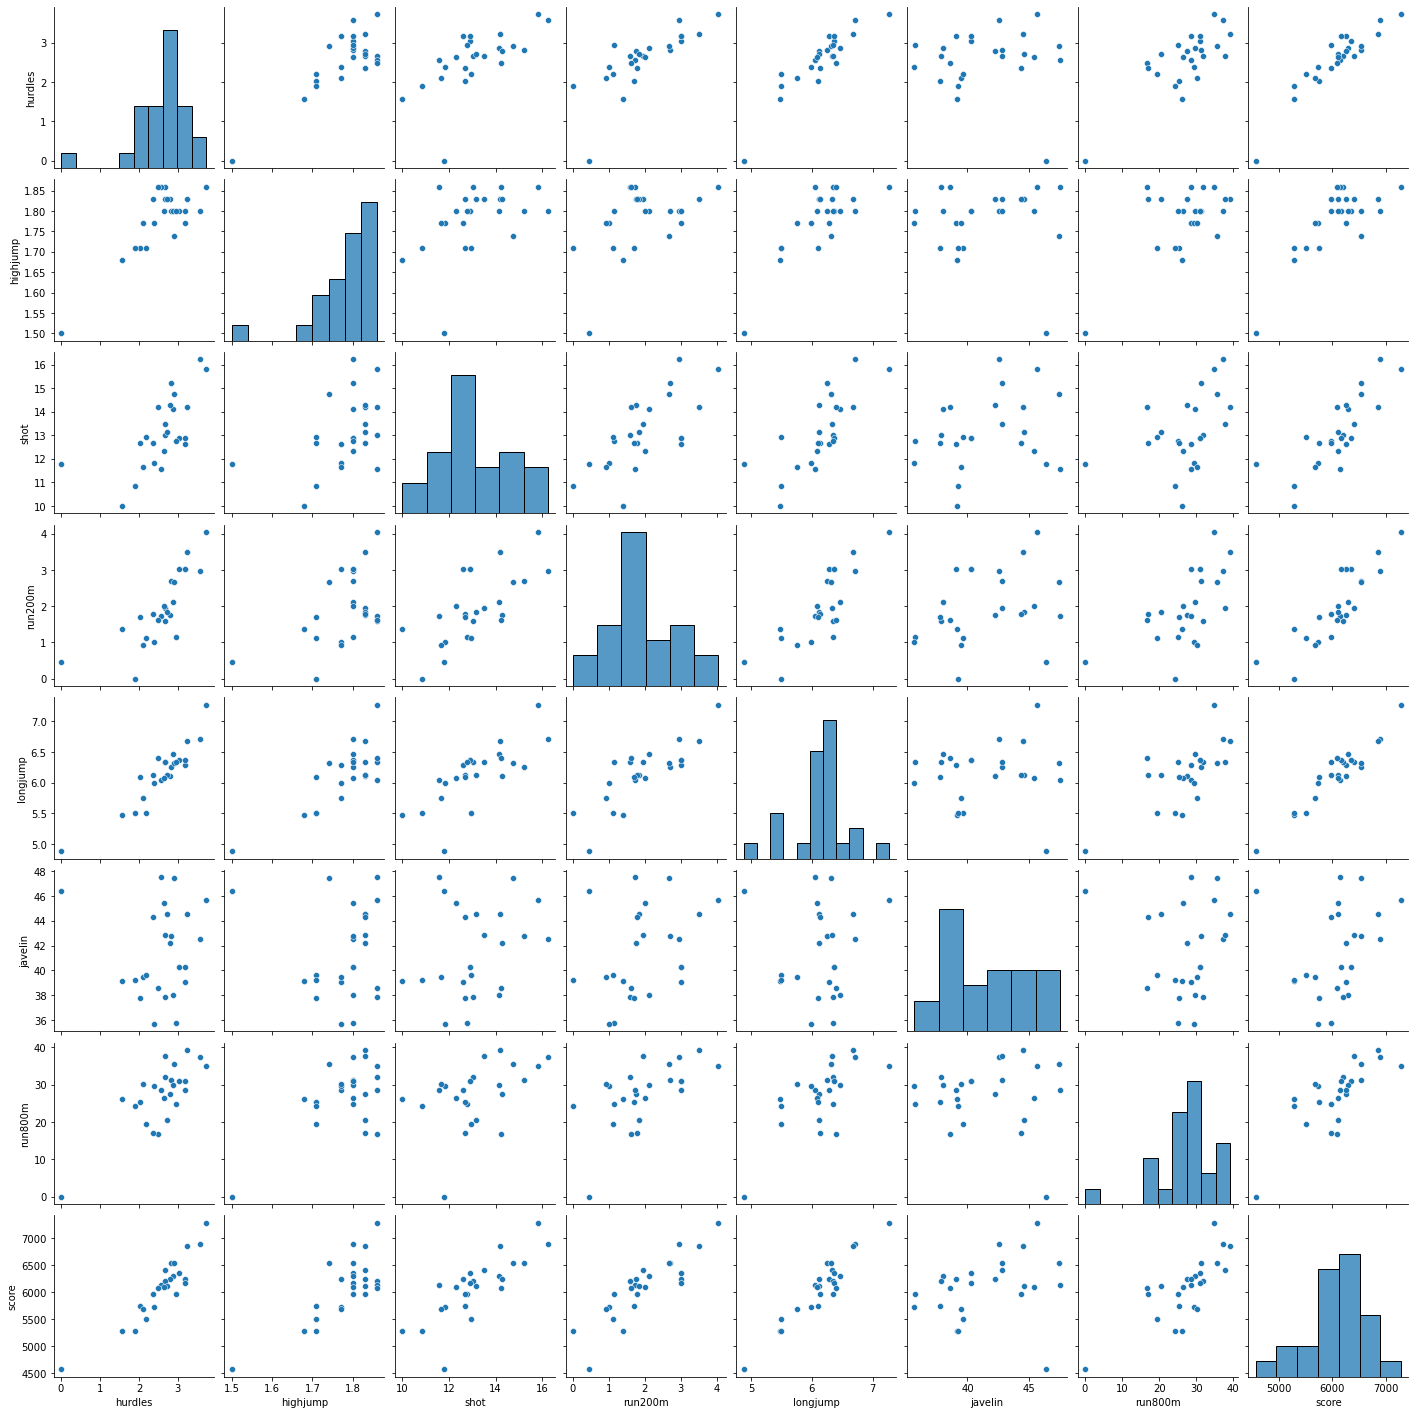

In [6]:
sns.pairplot(heptathlon)
plt.show()

- 대부분 양의 상관관계
- 투창은 다른 경기 결과와 상관관계가 낮음
- 투창을 제외한 나머지는 대부분 심한 이상치 존재

In [7]:
heptathlon[heptathlon.hurdles == min(heptathlon.hurdles)]

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Launa (PNG),0.0,1.5,11.78,0.45,4.88,46.38,0.0,4566


In [8]:
~heptathlon.index.str.contains('PNG') # PNG가 포함되어 있는 행

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [9]:
heptathlon.index

Index(['Joyner-Kersee (USA)', 'John (GDR)', 'Behmer (GDR)',
       'Sablovskaite (URS)', 'Choubenkova (URS)', 'Schulz (GDR)',
       'Fleming (AUS)', 'Greiner (USA)', 'Lajbnerova (CZE)', 'Bouraga (URS)',
       'Wijnsma (HOL)', 'Dimitrova (BUL)', 'Scheider (SWI)', 'Braun (FRG)',
       'Ruotsalainen (FIN)', 'Yuping (CHN)', 'Hagger (GB)', 'Brown (USA)',
       'Mulliner (GB)', 'Hautenauve (BEL)', 'Kytola (FIN)', 'Geremias (BRA)',
       'Hui-Ing (TAI)', 'Jeong-Mi (KOR)', 'Launa (PNG)'],
      dtype='object')

- 이상치 제거 

In [10]:
heptathlon2 = heptathlon[~heptathlon.index.str.contains('PNG')].copy()

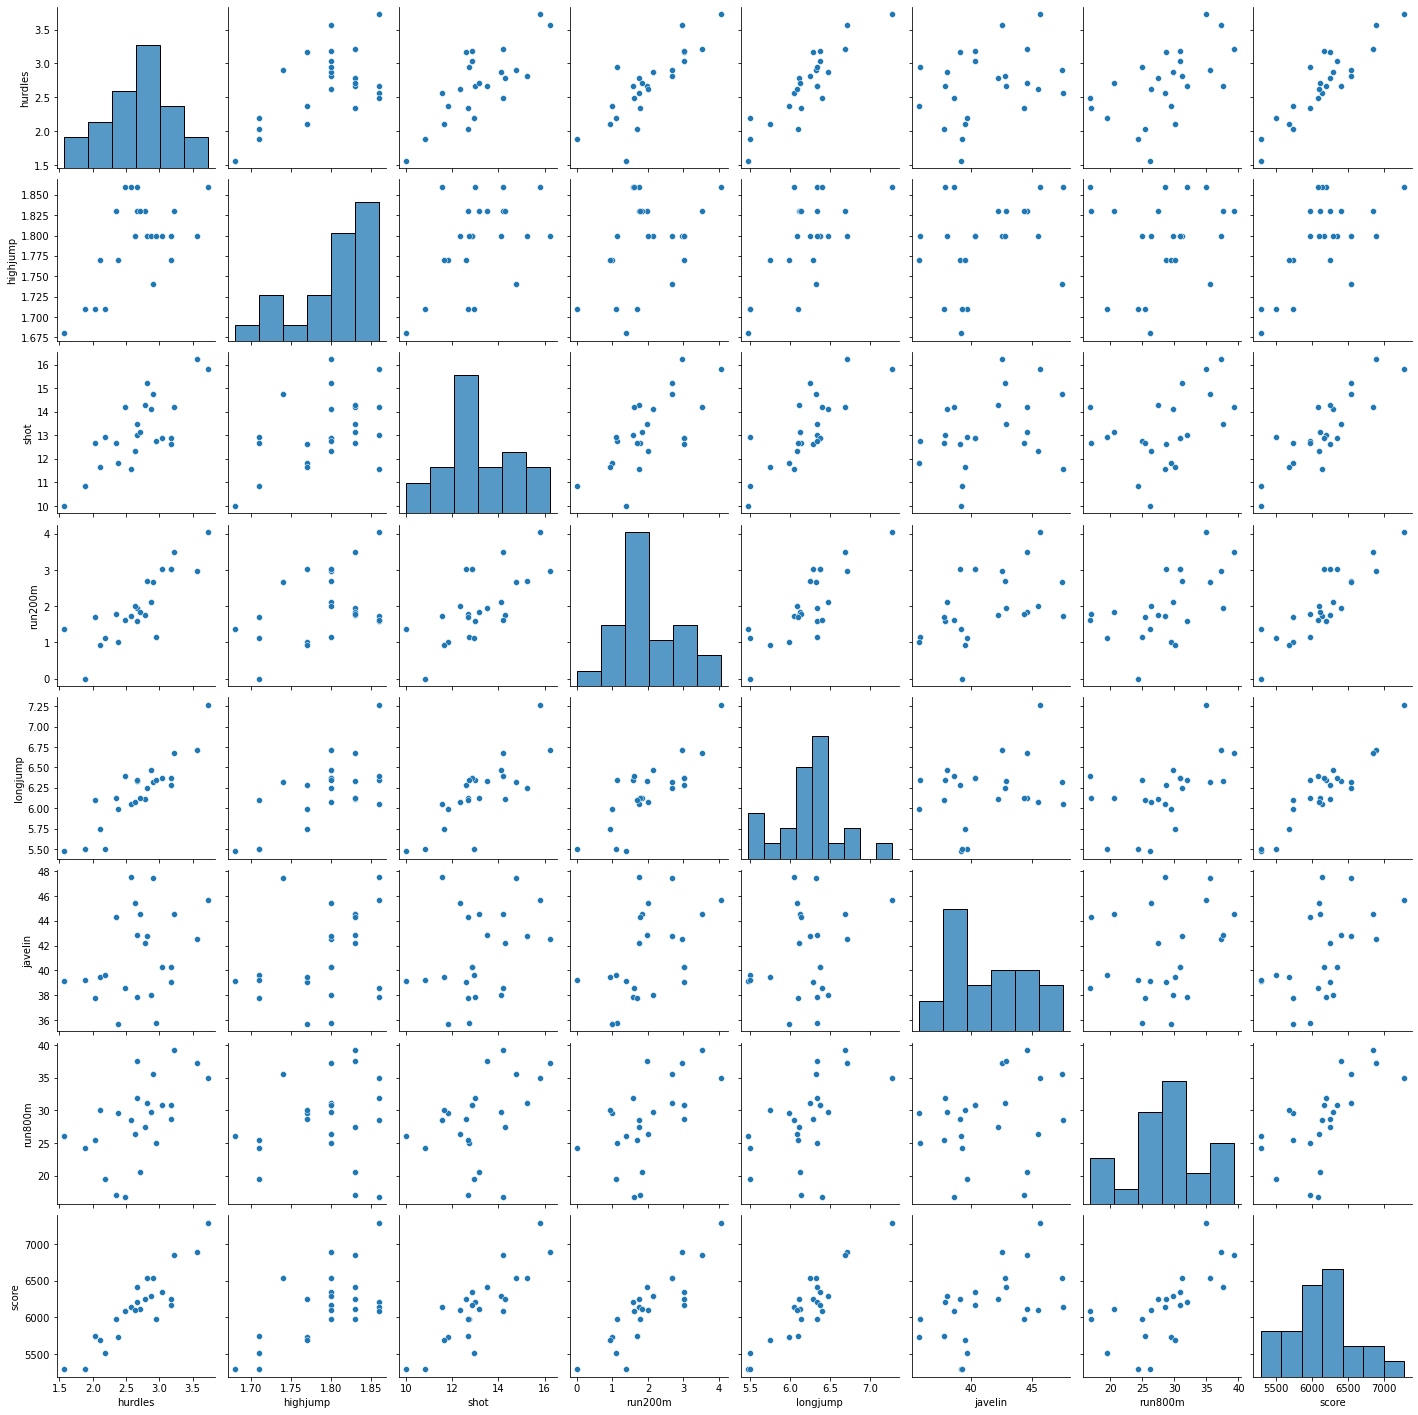

In [11]:
sns.pairplot(heptathlon2)
plt.show()

- 주성분분석 진행 

In [12]:
heptathlon2.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
Joyner-Kersee (USA),3.73,1.86,15.80,4.05,7.27,45.66,34.92,7291
John (GDR),3.57,1.80,16.23,2.96,6.71,42.56,37.31,6897
Behmer (GDR),3.22,1.83,14.20,3.51,6.68,44.54,39.23,6858
Sablovskaite (URS),2.81,1.80,15.23,2.69,6.25,42.78,31.19,6540
Choubenkova (URS),2.91,1.74,14.76,2.68,6.32,47.46,35.53,6540


score 열 제거

In [13]:
X = heptathlon2.iloc[:,:-1]

In [14]:
X.head()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
Joyner-Kersee (USA),3.73,1.86,15.80,4.05,7.27,45.66,34.92
John (GDR),3.57,1.80,16.23,2.96,6.71,42.56,37.31
Behmer (GDR),3.22,1.83,14.20,3.51,6.68,44.54,39.23
Sablovskaite (URS),2.81,1.80,15.23,2.69,6.25,42.78,31.19
Choubenkova (URS),2.91,1.74,14.76,2.68,6.32,47.46,35.53


In [15]:
X.describe()

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
count,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000
mean,2.687500,1.793750,13.173333,2.02375,6.205417,41.278333,28.516667
std,0.514564,0.052321,1.497150,0.93677,0.401659,3.468707,6.147248
min,1.570000,1.680000,10.000000,0.00000,5.470000,35.680000,16.760000
25%,2.372500,1.770000,12.545000,1.53000,6.072500,38.945000,25.295000
50%,2.690000,1.800000,12.915000,1.80500,6.265000,40.280000,29.110000
75%,2.972500,1.830000,14.202500,2.75750,6.370000,44.390000,31.377500
max,3.730000,1.860000,16.230000,4.05000,7.270000,47.500000,39.230000


표준화 진행
- 표준편차가 다른경우에 covariance Matrix를 기준으로 주성분 분석을 진행하면 분산이 큰 쪽의 영향을 많이 받음

In [16]:
X_scale = StandardScaler().fit_transform(X)

In [17]:
X_scale

array([[ 2.06956174,  1.29345261,  1.79217892,  2.2095401 ,  2.70746878,
         1.29036756,  1.06406235],
       [ 1.75193116,  0.12202383,  2.08556862,  1.02094111,  1.28326602,
         0.3774411 ,  1.46121629],
       [ 1.05711427,  0.70773822,  0.70049633,  1.6206929 ,  1.20696945,
         0.96053606,  1.78026882],
       [ 0.24318591,  0.12202383,  1.403267  ,  0.7265175 ,  0.11338519,
         0.44222943,  0.44423634],
       [ 0.44170502, -1.04940495,  1.08258524,  0.71561293,  0.29141053,
         1.82045388,  1.165428  ],
       [-0.03474084,  0.70773822,  0.2228852 , -0.06951668,  0.31684273,
         0.45400912,  1.51605344],
       [ 0.69977987,  0.12202383, -0.20014181,  1.08636858,  0.41857149,
        -0.29400158,  0.39438438],
       [ 0.36229738,  0.12202383,  0.65273522,  0.11586114,  0.67289341,
        -0.96544427,  0.20993214],
       [ 0.20348209,  0.70773822,  0.75508046, -0.29851282, -0.2426655 ,
         0.27142383, -0.18888353],
       [ 0.95785471, -0.4636

In [18]:
pca=PCA().fit(X_scale) 

In [19]:
pca.explained_variance_ratio_  #lambda / p 

array([0.61766317, 0.12842778, 0.11853453, 0.06667967, 0.04261745,
       0.01626797, 0.00980943])

In [20]:
np.cumsum(pca.explained_variance_ratio_) # 누적 분산 설명 비율

array([0.61766317, 0.74609094, 0.86462548, 0.93130515, 0.9739226 ,
       0.99019057, 1.        ])

In [21]:
# 1차원으로 축소: 62% 
# 2차원으로 축소: PC1+PC2, 75% 
# 3차원으로 축소: 86%

#### Scree plot

In [22]:
X_scale.shape

(24, 7)

In [23]:
X_scale.shape[1]

7

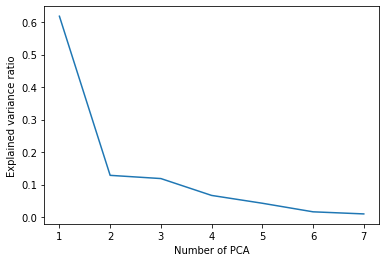

In [24]:
plt.plot(np.arange(1,X_scale.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('Number of PCA')
plt.ylabel('Explained variance ratio')
plt.show()

- 7개 변수를 2개 주성분점수로 축약할 때 총분산의 74.6% 설명가능
- 팔꿈치 역시 주성분 개수 2일 때 존재 

#### PC scores
- 변환된 주성분 $y_1, \ldots, y_p$ 값 

In [25]:
x_reduced = pca.transform(X_scale)

In [26]:
x_reduced.shape, X_scale.shape

((24, 7), (24, 7))

Example) 1st PC: $y_1 = \mathbf a_1'\mathbf x = a_{11}x_1 +a_{21}x_2 + \cdots + a_{p1} x_p$

In [27]:
pca.components_.shape

(7, 7)

In [28]:
pca.components_[0]  # loadings: a_i1 // 각각의 변수에 대한 가중치

array([0.45038762, 0.31451151, 0.40248839, 0.42708602, 0.4509639 ,
       0.24230795, 0.30290682])

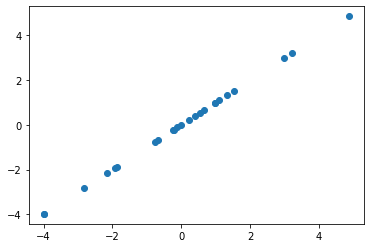

In [29]:
plt.scatter(np.matmul(X_scale, pca.components_[0]), x_reduced[:,0])
plt.show()

- 표준점수 시스템에 의한 점수와 첫번째 주성분점수와의 상관계수는 0.99

In [30]:
np.corrcoef(heptathlon2.score,x_reduced[:,0] )

array([[1.        , 0.99311684],
       [0.99311684, 1.        ]])

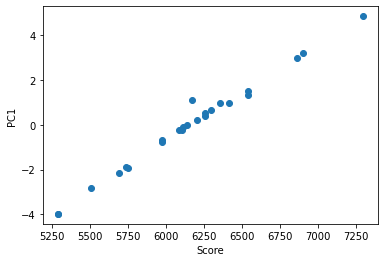

In [31]:
plt.scatter(heptathlon2.score,x_reduced[:,0])
plt.xlabel('Score')
plt.ylabel('PC1')
plt.show()

In [32]:
heptathlon2.columns

Index(['hurdles', 'highjump', 'shot', 'run200m', 'longjump', 'javelin',
       'run800m', 'score'],
      dtype='object')

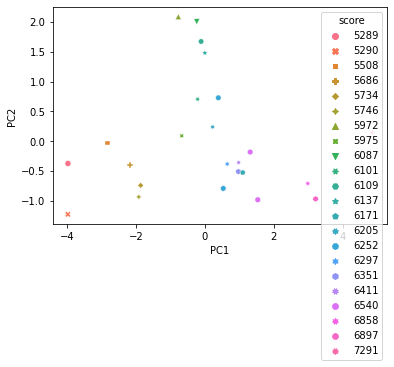

In [33]:
sns.scatterplot(x = x_reduced[:,0], y = x_reduced[:,1],
               hue = heptathlon2.score.astype('category'),
               style = heptathlon2.score)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### 행렬도(Biplot)
- 원변수와 주성분 점수와의 관계를 2차원 그래프로 표현하여 각 주성분의 의미와 관측치의 특성을 주성분 차원에서 탐색
- PC1과 PC2의 score 간의 산점도
- 화살표의 의미
    - 원변수와 PC간의 상관계수를 표현
    - PC와 평행할 수록 해당 PC에 큰 영향
    - 벡터의 길이가 원변수의 분산을 표현

In [34]:
def biplot(score,coeff, labels=None, index = X.index):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    for i in range(score.shape[0]):
        if index is None:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], str(i))
        else:
            plt.text((xs * scalex)[i] , (ys * scaley)[i], index[i])

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

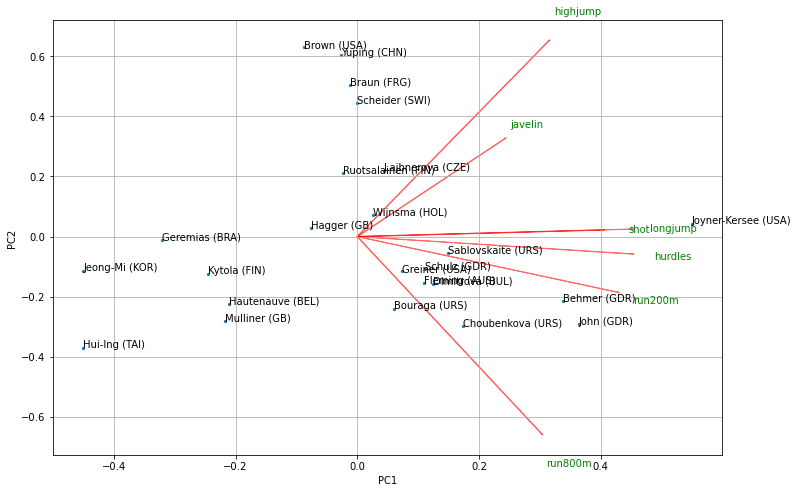

In [35]:
plt.figure(figsize=(12,8))
biplot(x_reduced[:,0:2],np.transpose(pca.components_[0:2, :]), X.columns )

- 수직으로 내린 값이 선수가 해당변수에서 가지고 있는 상대적 위치
- 원변수들끼리 각도가 작으면 correlation이 높다
- 전체 차원으로 보면 길이가 모두 같지만, PC1, PC2로만 관찰해서 길이가 다르다.
- 표준화를 거쳤기 때문에 길이가 그나마 비슷하다.

- Joyner-Kersee는 hurdle, longjump, shot, run200에서 좋은 성적을 거둠
- run200m, hurdles, longjump, shot은 상관관계가 높음
- javeli과 highjump는 상관관계가 높음
- run800m은 다른 종목들과 비교적 상관관계가 적음
- PC1은 경쟁자들의 전체적인 점수에 의해서 분리
- PC2는 선수들이 각자 잘한 종목을 구분

#### Example: Face data 사진압축
- 100개의 사진과 얼굴의 각 부위의 특징을 포함하고 있는 데이터
- 이미지의 픽셀 값(96*96)을 벡터로 변환하여 저장 

In [36]:
face = pd.read_csv(data_path+'face100.csv')
im_train = face.Image 

In [37]:
face.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [38]:
face.shape

(100, 31)

문자형식으로 되어있는 im_train을 잘라서 넣어서 숫자화시킴

In [39]:
im_train

0     238 236 237 238 240 240 239 241 241 243 240 23...
1     219 215 204 196 204 211 212 200 180 168 178 19...
2     144 142 159 180 188 188 184 180 167 132 84 59 ...
3     193 192 193 194 194 194 193 192 168 111 50 12 ...
4     147 148 160 196 215 214 216 217 219 220 206 18...
                            ...                        
95    201 200 200 201 200 200 201 200 203 152 40 12 ...
96    209 209 208 208 207 206 211 216 127 70 68 57 5...
97    159 97 35 14 15 17 20 20 13 20 32 34 30 25 13 ...
98    144 166 182 182 177 139 67 43 48 48 45 44 46 4...
99    184 186 187 186 173 149 107 76 65 62 62 55 49 ...
Name: Image, Length: 100, dtype: object

In [40]:
im_train[0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [41]:
len(im_train[0].split())

9216

In [42]:
96*96

9216

In [43]:
im_train.shape

(100,)

In [44]:
im_train2 = np.zeros((face.shape[0], 9216)) # 100개의 행에 9216개의 열을 넣어준다.
for j in range(face.shape[0]):
    im_train2[j,:]=np.array([int(i) for i in im_train[j].split()])

In [45]:
im_train2[0]

array([238., 236., 237., ...,  70.,  75.,  90.])

In [46]:
len(im_train2[0])

9216

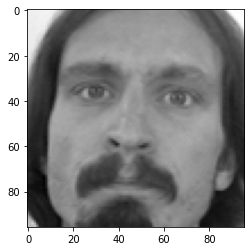

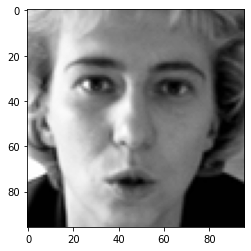

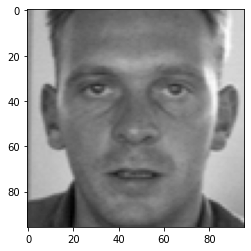

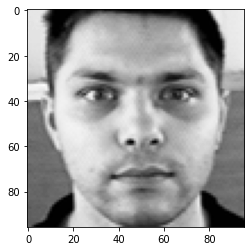

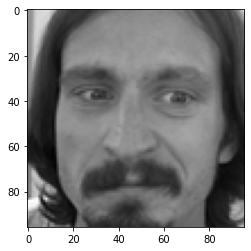

In [47]:
for i in range(5):
    plt.figure(i)
    plt.imshow(im_train2[i,:].reshape(96, 96), cmap="gray")

- 100*9216 크기의 데이터에 PCA를 적용 

In [48]:
face_scaler = StandardScaler().fit(im_train2)
im_train2_scale = face_scaler.transform(im_train2)

In [49]:
im_train2_scale.shape

(100, 9216)

In [50]:
pca_face = PCA(n_components=0.9).fit(im_train2_scale) # 90% 설명
# n_components: 몇개의 차원을 남길건지 


In [51]:
pca_face.explained_variance_ratio_.shape

(26,)

In [52]:
np.cumsum(pca_face.explained_variance_ratio_)

array([0.48466357, 0.5929637 , 0.64782934, 0.68572173, 0.71351795,
       0.73731138, 0.75656734, 0.77384997, 0.78879148, 0.80127075,
       0.81280618, 0.82257629, 0.8313898 , 0.83912777, 0.84638669,
       0.85298226, 0.85926315, 0.865202  , 0.87059593, 0.87563313,
       0.88058191, 0.88511357, 0.88948354, 0.89364895, 0.89766825,
       0.9014451 ])

In [53]:
# pca_face = PCA().fit(im_train2_scale)
# np.cumsum(pca_face.explained_variance_ratio_)

- 분산의 90%를 설명하는 최소 PC를 사용하여 데이터 축소

In [54]:
X_reduced = pca_face.transform(im_train2_scale)

In [55]:
X_reduced.shape # 9216 -> 26으로 축소

(100, 26)

- 축소된 PC를 사용하여 원래 데이터의 공간으로 재변환

In [56]:
X_reconstr = pca_face.inverse_transform(X_reduced)

In [57]:
X_reconstr.shape # 축소하기 전 상태로 변환

(100, 9216)

In [58]:
im_train2_reconstr = face_scaler.inverse_transform(X_reconstr)

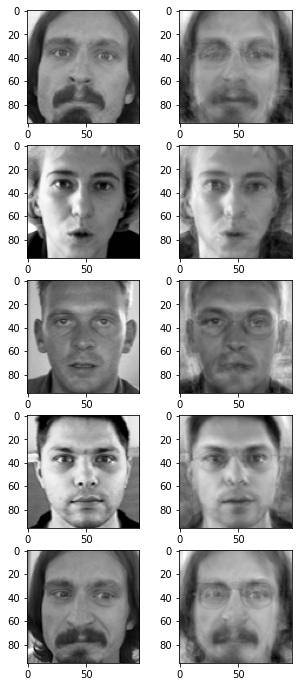

In [59]:
plt.figure(figsize=(5,12))
for i in np.arange(0,5):
    plt.subplot(5,2,2*i+1)
    plt.imshow(im_train2[i,:].reshape(96, 96), cmap="gray") # 원본
    plt.subplot(5,2,2*(i+1))
    plt.imshow(im_train2_reconstr[i,:].reshape(96, 96), cmap="gray") # 압축하고 다시 원복
    